In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original seed analysis

In [2]:
# load results of base case
base_case_results = load_results('../data/output/EMA/seedAnalysisBaseCase.tar.gz')
base_case_outcomes = pd.DataFrame(base_case_results[1])

<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [3]:
# load results of bad case
bad_case_results = load_results('../data/output/EMA/seedAnalysisBadCase.tar.gz')
bad_case_outcomes = pd.DataFrame(bad_case_results[1])

In [4]:
def plot_convergence(outcomes, sample, title, name):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(16,11))

    # make copy of results
    con = outcomes.copy().head(sample)

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'averageMeanSpeed'] = con.loc[:index, 'meanSpeed'].mean()
        con.loc[index, 'stdMeanSpeed'] = con.loc[:index, 'meanSpeed'].std()
        con.loc[index, 'averageMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'stdMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].std()
        con.loc[index, 'averageMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'stdMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].std()

    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[0][0].set_ylabel('average of mean \n speed values (m/s)', fontsize=14, weight='bold')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[0][1].set_ylabel('std of mean \n speed values (m/s)', fontsize=14, weight='bold')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[1][0].set_ylabel('average of mean \n density values (#/m²)', fontsize=14, weight='bold')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[1][1].set_ylabel('std of mean \n density values (#/m²)', fontsize=14, weight='bold')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[2][0].set_ylabel('average of max \n density values (#/m²)', fontsize=14, weight='bold')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set_xlabel('sample size (iterations)', fontsize=14, weight='bold')
    axs[2][1].set_ylabel('std of max \n density values (#/m²)', fontsize=14, weight='bold')
    plt.savefig('../figures/conv_{}{}'.format(name, '.png'), bbox_inches='tight')
    plt.show()

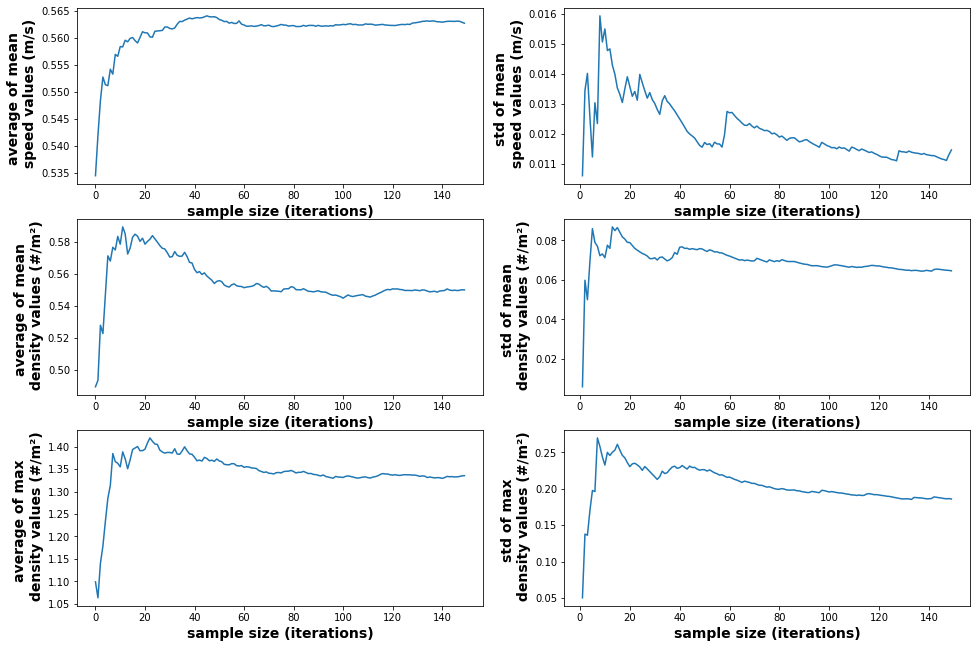

In [5]:
plot_convergence(base_case_outcomes, 150, 'Base case scenario', 'base_case')

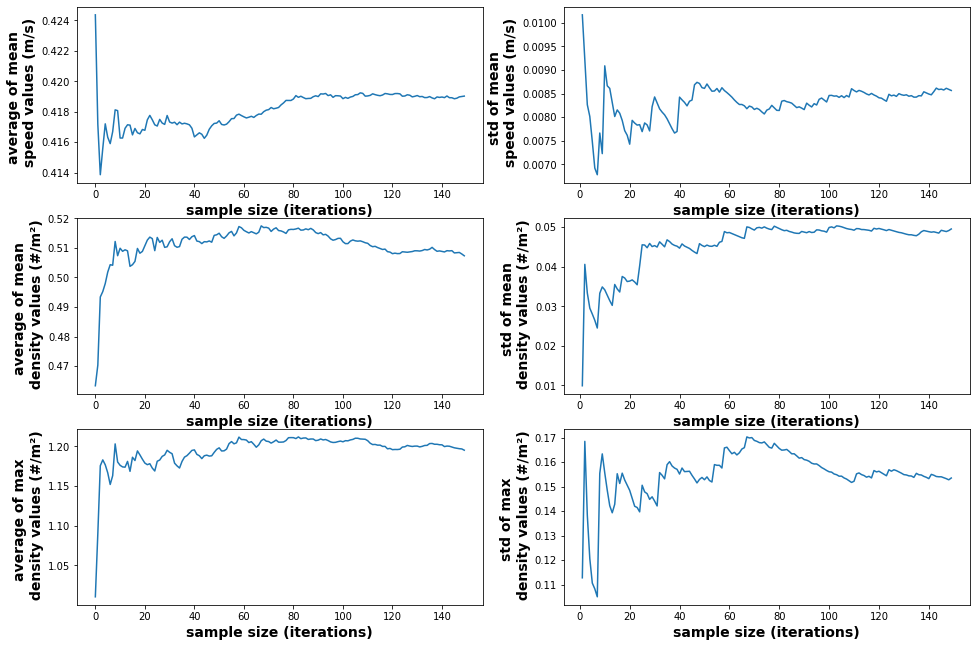

In [6]:
plot_convergence(bad_case_outcomes, 150, 'Hypothesized bad case scenario', 'bad_case')

# Additional seed analysis
Check 4 runs with 60 replications for both cases

In [7]:
# load results of base case
add_base_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBaseCase.tar.gz')
add_base_case_outcomes = pd.DataFrame(add_base_case_results[1])

In [8]:
# load results of bad case
add_bad_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBadCase.tar.gz')
add_bad_case_outcomes = pd.DataFrame(add_bad_case_results[1])

In [9]:
add_base_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.564159,0.011192,0.545695,0.061461,1.319628,0.199713
std,0.001337,0.000711,0.009210,0.005290,0.029993,0.018936
min,0.562511,0.010061,0.535645,0.053384,1.275144,0.177946
25%,0.563393,0.010815,0.539224,0.058143,1.297962,0.187792
50%,0.563680,0.011466,0.543005,0.061811,1.324620,0.191891
75%,0.564751,0.011683,0.552808,0.063520,1.345591,0.211784
max,0.566483,0.012084,0.561741,0.069557,1.358736,0.238238


In [10]:
add_bad_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.418608,0.007789,0.508691,0.047577,1.196219,0.147163
std,0.000900,0.000698,0.003907,0.006281,0.011173,0.011783
min,0.417661,0.006353,0.502209,0.034766,1.174716,0.122011
25%,0.417810,0.007462,0.507386,0.045772,1.188894,0.143721
50%,0.418535,0.007826,0.508566,0.048939,1.199527,0.149840
75%,0.419130,0.008188,0.510516,0.051963,1.203293,0.154198
max,0.420009,0.008851,0.515216,0.053868,1.210161,0.161878


# Compare with no group scenario
Seperate run with no group forming but roughly same amount of pedestrians as base scenario

In [11]:
# load results of base case
noGroups_base_case_results = load_results('../data/output/EMA/noGroupsBaseCase.tar.gz')
noGroups_base_case_outcomes = pd.DataFrame(noGroups_base_case_results[1])

In [12]:
# load results of bad case
noGroups_bad_case_results = load_results('../data/output/EMA/noGroupsBadCase.tar.gz')
noGroups_bad_case_outcomes = pd.DataFrame(noGroups_bad_case_results[1])

In [13]:
noGroups_base_case_outcomes

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
0,0.682559,0.553924,1.283119,0.163132,0.412542,1.301276,3.005366,0.860882,2.212347


In [14]:
base_case_outcomes.head(60).mean()

meanSpeed           0.562529
meanDensityArea1    0.552080
maxDensityArea1     1.357850
dtype: float64

In [15]:
noGroups_bad_case_outcomes

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
0,0.513056,0.576287,1.302023,0.121456,0.413664,0.813984,2.325902,0.519151,1.537702


In [16]:
bad_case_outcomes.head(60).mean()

meanSpeed           0.417743
meanDensityArea1    0.516807
maxDensityArea1     1.208684
dtype: float64